In [1]:
import numpy as np

# Question 1 - Rounding Errors

### (a)

In [2]:
a = (1-1)+10**(-16)
a

1e-16

In [3]:
b = 1-(1+10**(-16))
b

0.0

Theoretically, a = 10^(-16) and b = - 10^(-16) while in pratice b is computed to be 0.
Since the machine epsilon is 2.22x10^(-16), the value in the parenthesis (1+10**(-16)) is then calculated as 1, hence the value of b is calculated as 1-1=0.

### (b) 

In [4]:
def create_HibertMatrix(n):
    H = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            H[i][j]=1/(i+1+j+1-1)
    return H

def create_ColumnVector(n):
    e = np.zeros((n,1))
    for i in range(n):
        e[i][0]=1
    return e

In [5]:
for n in [5, 10, 20]:
    print('When n =', n)
    H = create_HibertMatrix(n)
    e = create_ColumnVector(n)
    H_inv = np.linalg.inv(H)
    result = np.linalg.norm(H@(H_inv@e)-e)
    condition_num = np.linalg.norm(H)*np.linalg.norm(H_inv)
    print('The value we get is', result)
    print('The condition number we get is', condition_num)
    print('')

When n = 5
The value we get is 7.121339907719716e-12
The condition number we get is 480849.1169979506

When n = 10
The value we get is 7.998270949302708e-05
The condition number we get is 16333640022240.15

When n = 20
The value we get is 7.047686992816418
The condition number we get is 2.3649314699981783e+18



Theoretically, all the norm value should be zero, since H(H_inv@e)=(H@H_inv)e=I@e=e.
However, in pratice, we fail to get zero as result and the error becomes even larger when n increases. This is because the matrix is poorly conditioned, as can be seen in the large value of the condition number.

### (c)

In [6]:
import math

# Numerical Calculation of the derivatives
def f(x):
    return math.exp(x)/((math.cos(x))**3+(math.sin(x))**3)

x0 = math.pi/4
f_x0 = f(x0)

hs = [10**(-k) for k in range(1, 17)]

derivative_num = []
for h in hs:
    df_num = (f(x0+h)-f_x0)/h
    derivative_num.append(df_num)

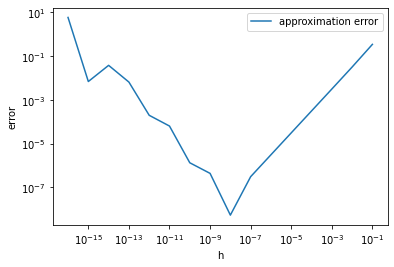

In [7]:
import matplotlib.pyplot as plt

# Present the errors in the resulting approximation in a log-log plot
exact_df = 3.101766393836051
ys = [abs(df - exact_df) for df in derivative_num]

plt.figure()
plt.loglog(hs, ys, label = 'approximation error')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.show()

As h becomes smaller, the approximation error first becomes smaller with 10^(-8) giving the smallest error. Then, when h becomes even smaller, the error becomes larger.
We get the best approximation to the derivative at h = 10^(-8)

# Question 3 - Newton's Method for Systems

### (d)

In [8]:
# Implement the Newton Method in 2D

def f1(x, y):
    return x**2+4*y**2-4

def f2(x, y):
    return 2*y-math.sqrt(3)*x**2 

def Jf(x, y):
    J = np.zeros((2, 2))
    J[0][0] = 2*x
    J[0][1] = 8*y
    J[1][0] = -2*3**(1/2)*x
    J[1][1] = 2
    return J

def Newton_Iter(x, y):
    current = np.zeros((2, 1))
    current[0][0] = x
    current[1][0] = y
    temp = np.zeros((2, 1))
    temp[0][0] = f1(x, y)
    temp[1][0] = f2(x, y)
    Jacobi = Jf(x, y)
    J_inv = np.linalg.inv(Jacobi)
    output = current - J_inv@temp
    return output    

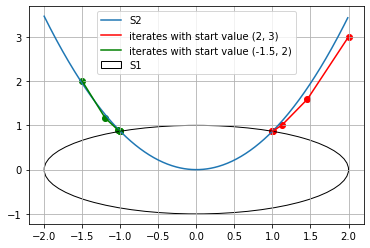

In [9]:
# Use the Newton's Method

start_value1 = (2, 3)
start_value2 = (-1.5, 2)

def NewtonFor5Iter(starting_value):
    x0 = starting_value[0]
    y0 = starting_value[1]
    xlist = [x0]
    ylist = [y0]
    x_cur = x0
    y_cur = y0
    for i in range(5):
        new = Newton_Iter(x_cur,y_cur)
        x_cur = new[0][0]
        y_cur = new[1][0]
        xlist.append(x_cur)
        ylist.append(y_cur)
    return xlist, ylist
    
    
# Plot the curves S1,S2 and the iterates

# We first plot the curves of S1 and S2
from matplotlib.patches import Ellipse

a=2
b=1
ell = Ellipse(xy=[0, 0], width=2*a, height=2*b, fill=False,label='S1') 
fig, ax = plt.subplots()
ax.add_patch(ell)
ax.autoscale()

S2_x = np.arange(-2, 2, 0.01)
S2_y = (math.sqrt(3)/2)*S2_x**2
plt.plot(S2_x, S2_y, label='S2')

# Now we plot the iterates
# When the starting value is (2, 3)
xlist1, ylist1 = NewtonFor5Iter(start_value1)
plt.plot(xlist1, ylist1, label='iterates with start value (2, 3)', c='r')
plt.scatter(xlist1, ylist1, c='r')

# When the starting value is (-1.5, 2)
xlist2, ylist2 = NewtonFor5Iter(start_value2)
plt.plot(xlist2, ylist2, label='iterates with start value (-1.5, 2)', c='g')
plt.scatter(xlist2, ylist2, c='g')

plt.legend()
plt.grid()
plt.show()